In [1]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


# Download dataset and convert to yolo format
yaml 裡有

In [ ]:
# import os
# from pathlib import Path

# from ultralytics.utils.downloads import download

# def visdrone2yolo(dir):
#     from PIL import Image
#     from tqdm import tqdm

#     def convert_box(size, box):
#         # Convert VisDrone box to YOLO xywh box
#         dw = 1. / size[0]
#         dh = 1. / size[1]
#         return (box[0] + box[2] / 2) * dw, (box[1] + box[3] / 2) * dh, box[2] * dw, box[3] * dh

#     (dir / 'labels').mkdir(parents=True, exist_ok=True)  # make labels directory
#     pbar = tqdm((dir / 'annotations').glob('*.txt'), desc=f'Converting {dir}')
#     for f in pbar:
#         img_size = Image.open((dir / 'images' / f.name).with_suffix('.jpg')).size
#         lines = []
#         with open(f, 'r') as file:  # read annotation.txt
#             for row in [x.split(',') for x in file.read().strip().splitlines()]:
#                 if row[4] == '0':  # VisDrone 'ignored regions' class 0
#                     continue
#                 cls = int(row[5]) - 1
#                 box = convert_box(img_size, tuple(map(int, row[:4])))
#                 lines.append(f"{cls} {' '.join(f'{x:.6f}' for x in box)}\n")
#                 with open(str(f).replace(f'{os.sep}annotations{os.sep}', f'{os.sep}labels{os.sep}'), 'w') as fl:
#                     fl.writelines(lines)  # write label.txt


#   # Download
# dir = Path('../datasets')  # dataset root dir
# urls = ['https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-train.zip',
#       'https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-val.zip',
#       'https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-test-dev.zip',
#       'https://github.com/ultralytics/yolov5/releases/download/v1.0/VisDrone2019-DET-test-challenge.zip']
# download(urls, dir=dir, curl=True, threads=4)

#   # Convert
# for d in 'VisDrone2019-DET-train', 'VisDrone2019-DET-val', 'VisDrone2019-DET-test-dev':
#     visdrone2yolo(dir / d)  # convert VisDrone annotations to YOLO labels

# Check CUDA (colab)

In [4]:
!nvidia-smi

Mon Dec 11 00:31:21 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.103                Driver Version: 537.13       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070 ...    On  | 00000000:01:00.0  On |                  N/A |
| 31%   39C    P5              35W / 255W |   2255MiB /  8192MiB |     10%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!apt-get update;
!wget https://developer.nvidia.com/compute/cuda/10.0/Prod/local_installers/cuda-repo-ubuntu1604-10-0-local-10.0.130-410.48_1.0-1_amd64 -O cuda-repo-ubuntu1604-10-0-local-10.0.130-410.48_1.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-10-0-local-10.0.130-410.48_1.0-1_amd64.deb
!apt-key add /var/cuda-repo-10-0-local/7fa2af80.pub
!apt-get update
!apt-get -y install gcc-7 g++-7
!apt-get -y install cuda
!export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda/lib64\${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}
%pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
%load_ext nvcc_plugin
!nvidia-smi
!free -g

%cd /usr/local/cuda-10.0/samples/1_Utilities/deviceQuery
!ls
!make
!./deviceQuery

%cd /usr/local/cuda-10.0/samples/1_Utilities/bandwidthTest
!ls
!make
!./bandwidthTest

In [ ]:
# 檢查一下目錄
%yolo settings

# Train

In [1]:
from ultralytics import YOLO
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Train the model retrain
results = model.train(data='VisDrone.yaml', epochs=50, imgsz=320)

h:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\train
New https://pypi.org/project/ultralytics/8.0.226 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.216 🚀 Python-3.9.18 torch-2.1.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=VisDrone.yaml, epochs=50, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_strid

Converting H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-train: 6471it [01:57, 55.20it/s] 


Converting H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-val


Converting H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-val: 548it [00:13, 42.04it/s]


Converting H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-test-dev


Converting H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-test-dev: 1610it [00:28, 57.06it/s] 

Dataset download success ✅ (180.2s), saved to ..\datasets




Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

train: Scanning H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-train\labels... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:08<00:00, 805.45it/s]

train: WARNING ⚠️ H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-train\labels.cache


val: Scanning H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-val\labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<00:00, 897.99it/s] 

val: New cache created: H:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\datasets\VisDrone\VisDrone2019-DET-val\labels.cache


Plotting labels to runs\detect\train8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to runs\detect\train8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.46G      2.353      2.747       1.05        549        320: 100%|██████████| 405/405 [00:49<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]

                   all        548      38759      0.413     0.0713     0.0584     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.15G      2.156      1.755     0.9734        616        320: 100%|██████████| 405/405 [00:43<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.41it/s]

                   all        548      38759       0.46     0.0902     0.0745     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.52G      2.099      1.642     0.9613        313        320: 100%|██████████| 405/405 [00:44<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.84it/s]

                   all        548      38759      0.156     0.0987     0.0762     0.0369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.37G      2.053      1.583     0.9531        546        320: 100%|██████████| 405/405 [00:44<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.44it/s]

                   all        548      38759      0.179      0.118     0.0924     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.2G      2.015      1.527     0.9439        416        320: 100%|██████████| 405/405 [00:46<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.85it/s]

                   all        548      38759      0.176      0.117     0.0954     0.0464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.76G      1.993      1.497     0.9359        443        320: 100%|██████████| 405/405 [00:44<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.02it/s]

                   all        548      38759      0.194      0.129      0.102     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       1.3G      1.963      1.462     0.9333        435        320: 100%|██████████| 405/405 [00:45<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.41it/s]

                   all        548      38759      0.204      0.114     0.0967     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.9G      1.942       1.44     0.9288        414        320: 100%|██████████| 405/405 [00:40<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.37it/s]

                   all        548      38759      0.197       0.13      0.109     0.0547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.48G      1.907      1.413      0.925        221        320: 100%|██████████| 405/405 [00:41<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.63it/s]

                   all        548      38759      0.224      0.134      0.117     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.69G      1.899        1.4      0.924        365        320: 100%|██████████| 405/405 [00:42<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.06it/s]

                   all        548      38759      0.317       0.15      0.122     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.38G      1.894      1.399     0.9253        228        320: 100%|██████████| 405/405 [00:43<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.23it/s]


                   all        548      38759      0.334      0.129      0.117     0.0562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.47G      1.859      1.368     0.9209        418        320: 100%|██████████| 405/405 [00:42<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]

                   all        548      38759      0.213      0.144       0.12     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.38G      1.862      1.364     0.9174        301        320: 100%|██████████| 405/405 [00:43<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.39it/s]

                   all        548      38759      0.221      0.147       0.12     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.16G      1.861      1.353     0.9164        572        320: 100%|██████████| 405/405 [00:45<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]

                   all        548      38759      0.231      0.151      0.128     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.47G      1.846      1.338     0.9147        207        320: 100%|██████████| 405/405 [00:42<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.44it/s]

                   all        548      38759      0.238      0.144      0.124     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.33G      1.827      1.326     0.9134        448        320: 100%|██████████| 405/405 [00:40<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.51it/s]

                   all        548      38759       0.22      0.149      0.127     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.48G      1.824       1.32     0.9107        566        320: 100%|██████████| 405/405 [00:40<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]

                   all        548      38759      0.232      0.153       0.13     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.57G      1.824      1.316     0.9098        639        320: 100%|██████████| 405/405 [00:39<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.66it/s]

                   all        548      38759      0.265      0.155      0.134     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.81G       1.81      1.295     0.9076        480        320: 100%|██████████| 405/405 [00:41<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.07it/s]

                   all        548      38759      0.226      0.158      0.137     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.7G      1.793      1.285     0.9069        561        320: 100%|██████████| 405/405 [00:43<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]

                   all        548      38759       0.26      0.156      0.137     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.3G      1.802      1.294     0.9051       1052        320:  53%|█████▎    | 214/405 [00:22<00:19,  9.61it/s]


KeyboardInterrupt: 

In [ ]:
#model.val()

# Test Model


image 1/1 h:\Repos\WalkerGuard-EmbeddedSystem\PedestrianVehicleDetection\train\..\datasets\VisDrone\VisDrone2019-DET-test-challenge\images\0000009_01723_d_0000006.jpg: 192x320 7 pedestrians, 94 cars, 1 van, 20.1ms
Speed: 1.0ms preprocess, 20.1ms inference, 3.5ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs\detect\predict


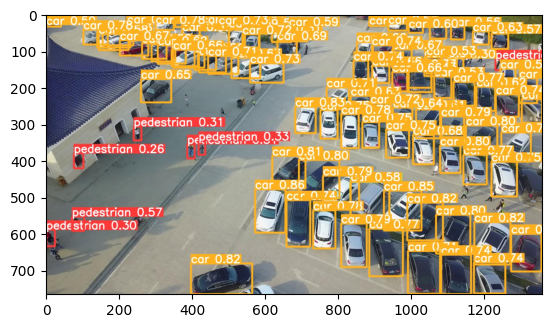

In [15]:
from ultralytics import YOLO
import os

# remove all previous predict result
for dir in os.listdir('runs/detect'):
    if dir.startswith('predict'):
        for file in os.listdir('runs/detect/'+dir):
            os.remove('runs/detect/'+dir+'/'+file)
        os.rmdir('runs/detect/'+dir)


model = YOLO('../model/best50epoch.pt')
# predict on an image and get the result
model.predict(source="../datasets/VisDrone/VisDrone2019-DET-test-challenge/images/0000009_01723_d_0000006.jpg",save=True)

# plot the result runs/detect/preidct/*.jpg
import matplotlib.pyplot as plt

img = plt.imread('runs/detect/predict/'+'0000009_01723_d_0000006.jpg')
plt.imshow(img)
plt.show()




